### Parcial 1: Jaider Stiven Rincón Gallego - 1036960267

Los siguientes datos fueron extraidos de los datos para la cuarta ola de infecciones por millon de habitantes (IPMH) de Colombia por la variante Omicrón del Coronavirus

A) Genere un data frame de pandas y agregé una nueva columna de IPMH con una incertidubre del 2 POR MIL aleatoria. Es decir, a cada IPMH sumarle o restarle un número aleatoria en el rango de su 2 POR MIL

B) Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine (para la columna con incertidumbre)

    1.La velocidad inicial de IPMH en IPMH/día
    2.La aceleración constante en IPMH/día**2
    3.El número máximo de IPMH que se alcanzaría
    4.El número de días en el que se alcanzaría dicho máximo
    5.Realice una gráfico que muestré el ajuste y la posición del máximo usando los estándares adecuados
    
 DATOS

    {'día':1,'IPMH':464},
    {'día':2,'IPMH':494},
    {'día':3,'IPMH':532},
    {'día':4,'IPMH':552},
    {'día':5,'IPMH':576},
    {'día':6,'IPMH':589}



# A.

In [182]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

datos = pd.DataFrame({'día': [1,2,3,4,5,6], 'IPMH': [464,494,532,552,576,589]})

In [183]:
datos

,día,IPMH
0,1,464
1,2,494
2,3,532
3,4,552
4,5,576
5,6,589


In [184]:
new_column = np.random.uniform(low=-0.002*datos.IPMH, high=0.002*datos.IPMH) + datos.IPMH
new_column

0    463.421241
1    494.597083
2    532.296133
3    551.755199
4    576.412275
5    588.143147
Name: IPMH, dtype: float64

In [186]:
datos = datos.assign(New_IPMH = new_column)
datos

,día,IPMH,New_IPMH
0,1,464,463.421241
1,2,494,494.597083
2,3,532,532.296133
3,4,552,551.755199
4,5,576,576.412275
5,6,589,588.143147


# B.  

Primero se realiza el correspondiente ajuste fit con np.polyfit


Como se considera un movimiento de caída libre la ecuación que rigue este movimiento es: 


$ x =  v_{0}t - \frac{1}{2} g t^{2} + x_{0}$

Pero en este caso para nuestro problema: 

$ IPMH =  v_{0}días - \frac{1}{2} (cte) (días^{2}) + IPMH_{0}$




In [191]:
Fit = np.polyfit(datos.día, datos.New_IPMH, 2)
Fit

array([ -2.6677276 ,  44.06021228, 420.68730511])

### 1.La velocidad inicial de IPMH en IPMH/día

la velocidad inicial es el coeficiente que acompaña al término de grado 1 en el anterior polinomio, es decir: 

$v_{0} = 44.06021228 \frac{IPMH}{día}$

Sin embargo podemos calcularla por otro método gracias a los métodos de los polinomios en python, si derivamos la ecuación de IPMH obtenemos la ecuación de velocidad. Si evaluamos esto en días = 0, obtenemos la velocidad inicial: 

$v = v_{0} +  (cte) (días) $

In [192]:
v = np.polyder(Fit,1)
v

array([-5.33545519, 44.06021228])

In [193]:
np.polyval(v,0)

44.060212281109685

Se observa que obtenemos el mismo valor. 

### 2.La aceleración constante en IPMH/día**2

En este caso, la aceleración es el termino que acompaña al tiempo en la ecuación de velocidad, es decir, la aceleración es el término que llamamos como $cte$. En este caso: 

$cte = a = -5.33545519 \frac{IPMH}{día^{2}}$

De nuevo podemos verificar este resultado por los métodos de polinomios de numpy, derivando la expresión que obtuvimos para la velocidad, vemos que coincide con nuestro resultado.

$a = cte$



In [196]:
a = np.polyder(v,1)
a

array([-5.33545519])

### 3.El número máximo de IPMH que se alcanzaría  y  4.El número de días en el que se alcanzaría dicho máximo

En este caso, el número máximo se alcanza cuando la velocidad es 0, es decir, podemos usar la ecuación del polynomio que obtuvimos en los puntos anteriores y usar un método como newton rapson o los métodos propios de numpy para encontrar la raiz: 

$v = 0 = v_{0} +  (cte) (días) $

En este caso encontramos el tiempo en el que IPMH es máximo, si reemplazamos este tiempo en el polinomio de ajuste, obtenemos el máximo IPMH 

In [197]:
t_max = np.roots(v)
t_max

array([8.25800437])

$t_{max} = 8.25800437 días$

Usando el método de Newton nos a el mismo valor:

In [198]:
optimize.newton(lambda t: v[1] + a*t,7) 

array([8.25800437])

Sustituyendo el $t_{max}$ en la ecuación del fit obtenemos el IPMH maximo: 


In [199]:
I_max = np.polyval(Fit,t_max)
I_max

array([602.61201784])

$IPMH_{max} = 602.61201784$

### 5.Realice una gráfico que muestré el ajuste y la posición del máximo usando los estándares adecuados

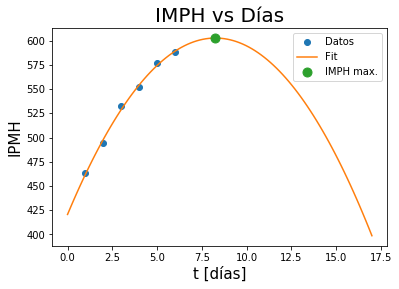

In [200]:
d = np.linspace(0,17,100)
plt.plot(datos.día,datos.New_IPMH,'o',label='Datos')
plt.plot(d,np.polyval(Fit,d),label='Fit')
plt.plot(t_max,I_max,'o', markersize=9, label = 'IMPH max.')
plt.xlabel('t [días]', size = 15)
plt.ylabel('IPMH',size = 15)
plt.title('IMPH vs Días',size=20)
plt.legend()